# Machine Learning -> Clasificación

### Titanic

La data de este NoteBook se obtuvo de Kaggle:
https://www.kaggle.com/c/titanic/data
Realizando una union entre la Data de Train y Test

In [1]:
'''Importar librerias basicas de trabajo'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Este Notebook se ejecuto en Google Colab, si usted lo desea ejecutar en un entorno local,salte a la celda numero 3

In [2]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic (4).csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\

In [3]:
'''Importo el Dataset'''
data = pd.read_csv('titanic.csv')

In [4]:
'''Exploracion rapida del la informacion '''
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
'''Checar la presencia de valores nulos'''
print('Porcetaje de valores nulos')
data.isnull().sum()/ data.shape[0] * 100

Porcetaje de valores nulos


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Ya que existe informacion que no es indispensable, elimino dicha informacion. Con el fin de contar con la data adecuada para los modelos de Machine Learning

Columnas a eliminar :
- PassengerId : Proporciona el Id del pasajero que el sistema le asigno, por lo que este Id, no es indispensable
- Name        : El nombre el pasajero no es una variable que influye en la supervivencia del accidente
- SibSp       : Proporciona el numero de hermanos abordo, de igual manera, por lo que esto no influye en la supervivencia individual del pasajero
- Parch       : Proporciona el numero de niños abordo relacionados con el pasajero, no influye en la supervivencia
- Ticket      : El numero de ticket, un tipo de numero de serie del boleto, por lo que si este numero es de los primero o ultimos , este no afectara en nada a la supervivencia.
- Fare        : Tarifa del pasajero, no influye en nada.
- Cabin       : Numeracion de la cabina donde se alojaba el pasajero, no influye
- Embarked    : Localidad en donde realizo el embarque, este no tiene representacion en la supervivencia

In [6]:
data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [7]:
data.head(2)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0


In [8]:
'''Checar la presencia de valores nulos'''
print('Porcetaje de valores nulos')
data.isnull().sum()/ data.shape[0] * 100

Porcetaje de valores nulos


Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
dtype: float64

Ya que cuento con un porcentaje considerable de datos nulos en la variable `Age`, opto por completar estos datos con el promedio de Edad segun el tipo de Clase.
Para esto empleo una copia del DataSet filtrado en donde realizo una limpieza de Outliers para evitar tener valor de edad fuera del rango e imputar con valores erroneos.

In [9]:
data_copy = data.copy()

In [10]:
'''Elimino valores nulos de mi Dataset copia'''
data_copy.dropna(inplace=True)

In [11]:
'''Reseteo el Index'''
data_copy.reset_index(inplace=True)

Text(0.5, 1.0, 'Presencia de Outliers "Age"')

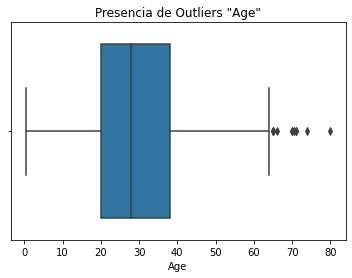

In [12]:
'''Checo la presencia de Outliers'''
sns.boxplot(data_copy['Age'])
plt.title('Presencia de Outliers "Age"')

In [13]:
'''Copia en la cual obtendre el promedio de edad'''
antes_limpieza = data_copy.shape[0]

In [14]:
'''Limpieza de outliers'''
def limpiar_dataframe(dataframe, columna):
    q25, q75 = np.percentile(dataframe[columna], [25, 75])
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [15]:
'''Aplico la funcion para limpiar Outliers'''
data_copy = limpiar_dataframe(data_copy, 'Age')

In [16]:
despues_limpieza = data_copy.shape[0]
print('Numero de datos  antes de limpar Otliers: {}'.format(antes_limpieza))
print('Numero de datos  antes de limpar Otliers: {}'.format(despues_limpieza))

Numero de datos  antes de limpar Otliers: 714
Numero de datos  antes de limpar Otliers: 703


In [17]:
'''Obtengo el promedio de edad segun el tipo de clases'''
age_mean = data_copy.groupby('Pclass')['Age'].mean().round(0)

In [18]:
'''Convieto a diccionario'''
age_mean = dict(round(age_mean))

Una vez que obtengo el promedio de edad segun la clase del barco, aplico estos datos para realizar la imputacion de valores faltantes sobre mi DataSet de Trabajo

In [19]:
'''Imputo sobre mis Data de Trabajo'''
data['Age'] = data['Age'].fillna(data.Pclass.map(age_mean))

In [20]:
'''Corroboro la no existencia de valores nulos'''
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [21]:
data.head(2)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0


Ya que cuento con variables categoricas, como es el caso de `Sex`, realizo su encoding para convertir a numerica su informacion

In [22]:
'''Creacion de nuevas columnas binarias para Sex'''
sex_get = pd.get_dummies(data['Sex'])

In [23]:
'''Visualizo la salida obtenida'''
sex_get.head(2)

,female,male
0,0,1
1,1,0


In [24]:
'''Union de Data'''
data = pd.concat([data,sex_get], axis=1)

In [25]:
'''Elimino la columna categorica'''
data.drop(['Sex'], axis=1, inplace=True)

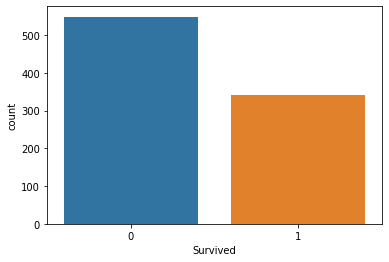

In [26]:
'''Balanceo de datos'''
sns.countplot(data['Survived'])

In [27]:
sobrevivientes = data[data['Survived'] == 1]
muertos = data[data['Survived'] == 0 ]
print('Sobrevivientes:{}\nNO sobrevivientes:{}'.format(len(sobrevivientes), len(muertos)))

Sobrevivientes:342
NO sobrevivientes:549


Ya que mi Dataset se encuentra desbalanceado, esto posiblemente afecte las predicciones del modelo, ya que la tendencia es que las personas no sobrevivan. Por lo cual balanceo los Datos para que el modelo cuente con una datos balanceados y la probalidad ahora sea del 50% y emplee las variables para tomar esa decision.

Para esto obtengo el total de personas Sobrevivientes, ya que estas representan la minoria, y empleo este total para tomar una muestra al azar de la data de las personas no sobrevivientes.

In [28]:
'''Muestra aleatoria igualando el total de sobrevivientes '''
muestra = np.random.randint(len(muertos), size=342)

In [29]:
'''Filtrado de personas seleccionadas al azar'''
no_sobrevivientes = muertos.iloc[muestra]

In [30]:
'''Verifico que contengan el mismo numero de datos'''
sobrevivientes.shape, no_sobrevivientes.shape

((342, 5), (342, 5))

In [31]:
'''Uno los datos'''
data_balanceada = pd.concat([sobrevivientes, no_sobrevivientes])
data_balanceada.reset_index(inplace=True)

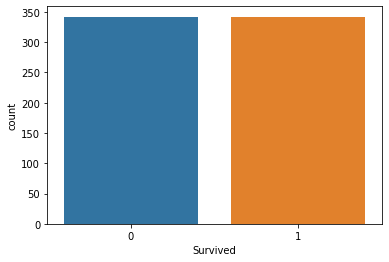

In [32]:
sns.countplot(data_balanceada['Survived'])

In [33]:
data_balanceada.drop(['index'],axis=1, inplace=True)

In [34]:
'''Separo en X e Y mis datos para entrenar el modelo '''
X = data_balanceada.drop(['Survived'], axis=1)
y = data_balanceada['Survived']

In [35]:
'''Divido mis datos en Train y Test empleando libreria de sklearn'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=40)

# DecisionTreeClassifier


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
'''Defino el modelo con los parametros por Default'''
arbol = DecisionTreeClassifier()

In [38]:
'''Entreno el modelo'''
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
'''Evaluo el desempeño del arbol empleando datos de Test'''
arbol.score(X_test, y_test)

0.8349514563106796

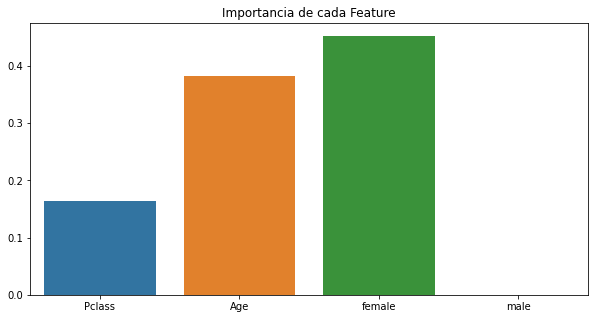

In [40]:
importances = arbol.feature_importances_
columns = X.columns
plt.figure(figsize=(10,5))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Con ayuda del grafico visualizo a cuales variables el modelo esta empleando como prioridad al momento de realizar las predicciones, en donde la Variable de si el pasajero es mujero es la variable que el modelo toma como mayor prioridad, seguida de la edad.

# Optimizacion de hiperparametros

Decido realizar una rapida busqueda de los mejores hiperparametros del  modelo. En este caso no empleo todos los hiperparametros ya que esto elevaria el costo de procesamiento computacional y al ser un modelo sencillo, posiblemente este no mejore significativamente.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
'''Seleccion de hiperparametros y su valores a testear'''
parametros = { 
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : np.arange(1,60,3),
    'random_state'      : np.arange(1,60,5),
    'class_weight'      : ['balanced', 'None'],
    'max_features'      : ['auto', 'sqrt', 'log2','None'],
    }

In [43]:
'''Defino el modelo'''
model = GridSearchCV(arbol, param_grid=parametros, cv=5)

In [44]:
'''Entreno el modelo'''
#NOTA !! Esta celda puede demorar en ejecutarse
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion

In [45]:
print("Mejores parametros : "+str(model.best_params_))
print("Mejor Score : "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(2)

Mejores parametros : {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'random_state': 46, 'splitter': 'random'}
Mejor Score : 0.8242105263157894



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003144,0.000538,0.001154,0.000247,balanced,gini,1,auto,1,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.802083,0.78125,0.75,0.768421,0.768421,0.774035,0.017202,2737
1,0.002617,0.000085,0.001064,0.000029,balanced,gini,1,auto,1,random,"{'class_weight': 'balanced', 'criterion': 'gin...",0.802083,0.78125,0.75,0.768421,0.768421,0.774035,0.017202,2737


Ya que obtengo mi modelo con los mejores hipeparametros. Evaluo el modelo empleando mis datos de Test

In [46]:
import sklearn.metrics as metrics
print('Score en Train:', metrics.accuracy_score(y_test, model.predict(X_test)))

Score en Train: 0.8300970873786407


Decido renombrar un nuevo modelo de Arbol de Decision pasandole los mejores parametros que obtuve en GridSearchCV

In [47]:
mejor_arbol = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 4,
                                     max_features = 'auto', random_state = 46, splitter = 'random')

In [48]:
'''Entreno el modelo'''
mejor_arbol.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=46, splitter='random')

In [49]:
'''Evaluo el desempeño del nuevo arbol en los datos de test'''
mejor_arbol.score(X_test,y_test)

0.8300970873786407

A manera mas visual, tomo una muestra no representativa del total de mis datos de X_test, con el fin del realizar una comparativa entre los datos reales y los datos predichos con el modelo. De nuevo con el fin de hacer mas visual el desempeño del modelo.

In [71]:
'''Tomo una muestra de mis datos de Test'''
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([165,  54,  83,  57,  83,  87,  19,  10,  35,  15])

In [72]:
'''Realizo la prediccion '''
prediccion = mejor_arbol.predict(data_balanceada[data_balanceada.index.isin(idxs)].loc[:, ['Pclass','Age',
                                                                                     'female', 'male']])

In [73]:
'''Veo la prediccion obtenida'''
prediccion

array([0, 1, 1, 1, 1, 1, 1, 1, 0])

In [74]:
'''Paso a una lista los valores reales de mi muestra tomada'''
valor_data = []
for i in idxs:
    valor_real = data_balanceada.Survived.iloc[i]
    valor_data.append(valor_real)

In [78]:
'''Paso a DataFrame los valores reales y valores predichos'''
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,0


Text(0, 0.5, 'Precio')

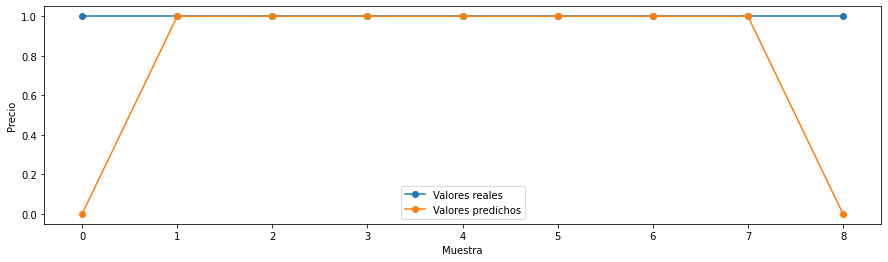

In [79]:
x = comparacion['valor_real']
y = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(x,'o-',label='Valores reales')
plt.plot(y,'o-',label='Valores predichos')
plt.legend()
plt.xlabel('Muestra')
plt.ylabel('Precio')

Con base en el grafico, el modelo realiza predicciones correctas en la mayoria de los datos tomados, siendo su Score de 0.82 , este modelo de cada 100 datos que se ingresen. Clasificara como sobrevivientes al 82% de los pasajeros

Conclusion
EL modelo presenta pocas mejorias al emplear GridSearchCV, por lo que la optimizacion del modelo no depende totalmente de sus parametros, por lo que una completa optimizacion seria realizar mayores cambios y adecuaciones a la data , en las que el modelo DecisionTreeClassifier sea más sensible.